In [1]:
import numpy as np
from hipscat_import.catalog.arguments import ImportArguments
from dask.distributed import Client
from hipscat_import.pipeline import pipeline_with_client
from hipscat_import.catalog.file_readers import FitsReader
from pathlib import Path
import lsdb
from astropy.table import Table
import matplotlib.pyplot as plt

## Get hipscatted catalogs

In [2]:
cat_mag = lsdb.read_hipscat("/ocean/projects/phy210048p/shared/hscmags/hscmags")

In [3]:
cat_pz = lsdb.read_hipscat("/ocean/projects/phy210048p/shared/hscpz_quaia_cross/demp")

In [4]:
cat_hsc_g = lsdb.read_hipscat("/ocean/projects/phy210048p/shared/hipscat/catalogs/hsc/hsc-pdr3-forced-g",
                              columns=['coord_ra','coord_dec','modelfit_CModel_fracDev','modelfit_CModel_exp_apCorr'])

## Crossmatching

*This crossmatches all hipscatted catalogs to build the big dataframe. Need to extend to rizy bands once they are available* 

In [5]:
match1 = cat_mag.crossmatch(cat_pz, radius_arcsec=1, suffixes=("_mag","_pz"))

/jet/home/edonoso/.conda/envs/lsdb_env/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:108: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


In [6]:
match2 = match1.crossmatch(cat_hsc_g, radius_arcsec=1, suffixes=("","_hsc_g")).compute()

/jet/home/edonoso/.conda/envs/lsdb_env/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:108: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


In [7]:
match2.columns

Index(['object_id_mag', 'g_cmodel_mag_mag', 'r_cmodel_mag_mag',
       'isprimary_mag', 'i_cmodel_mag_mag', 'z_cmodel_mag_mag',
       'y_cmodel_mag_mag', 'g_cmodel_magerr_mag', 'r_cmodel_magerr_mag',
       'i_cmodel_magerr_mag', 'z_cmodel_magerr_mag', 'y_cmodel_magerr_mag',
       'i_extendedness_value_mag', 'ra_mag', 'dec_mag', 'Norder_mag',
       'Dir_mag', 'Npix_mag', 'object_id_pz', 'photoz_best_pz',
       'photoz_conf_best_pz', 'photoz_risk_best_pz', 'stellar_mass_pz',
       'sfr_pz', 'ra_pz', 'dec_pz', 'Norder_pz', 'Dir_pz', 'Npix_pz',
       '_dist_arcsec', 'coord_ra_hsc_g', 'coord_dec_hsc_g',
       'modelfit_CModel_fracDev_hsc_g', 'modelfit_CModel_exp_apCorr_hsc_g'],
      dtype='object')

In [8]:
match2

,object_id_mag,g_cmodel_mag_mag,r_cmodel_mag_mag,isprimary_mag,i_cmodel_mag_mag,z_cmodel_mag_mag,y_cmodel_mag_mag,g_cmodel_magerr_mag,r_cmodel_magerr_mag,i_cmodel_magerr_mag,...,ra_pz,dec_pz,Norder_pz,Dir_pz,Npix_pz,_dist_arcsec,coord_ra_hsc_g,coord_dec_hsc_g,modelfit_CModel_fracDev_hsc_g,modelfit_CModel_exp_apCorr_hsc_g
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
1152921505319878656,42045736963038719,24.054588,23.396921,True,23.116793,22.991911,22.942009,0.015796,0.013386,0.013754,...,134.998711,0.001234,6,0,4096,0.0,134.998711,0.001234,1.0,0.984133
1152921505357627392,42045736963038720,25.580059,25.21903,True,25.100201,24.645592,24.43956,0.065117,0.075567,0.091862,...,134.999295,0.001358,6,0,4096,0.0,134.999295,0.001358,1.0,0.984036
1152921506351677440,42045736963038773,25.030376,23.988865,True,23.663059,23.368797,23.357758,0.060486,0.033936,0.036098,...,135.000339,0.002146,6,0,4096,0.0,135.000339,0.002146,0.0,0.983837
1152921506624307200,42045736963038772,24.754566,24.394215,True,24.060602,23.625294,23.278343,0.032087,0.034663,0.032505,...,135.001126,0.002717,6,0,4096,0.0,135.001126,0.002717,1.0,0.986229
1152921506678833152,42045736963038774,25.10216,25.138165,True,24.504381,24.458683,24.559799,0.052118,0.082332,0.059367,...,135.000903,0.003075,6,0,4096,0.0,135.000903,0.003075,0.0,0.986281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682136546866888704,41245601735642630,<NA>,30.601063,True,<NA>,25.078793,25.170525,<NA>,15.339904,<NA>,...,225.000867,-0.003261,6,40000,45055,0.0,225.000867,-0.003261,-0.0,0.978625
12682136547735109632,41245601735642646,24.479988,24.141069,True,<NA>,23.193203,23.12009,0.042538,0.048195,<NA>,...,225.002088,-0.002689,6,40000,45055,0.0,225.002088,-0.002689,0.237221,0.978815
12682136548003545088,41245601735642660,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,225.000674,-0.0027,6,40000,45055,0.0,225.000674,-0.0027,<NA>,0.978612


## Filtering

In [9]:
c1 = match2['isprimary_mag']==True
c2 = (match2['g_cmodel_mag_mag'] > 17.8) & (match2['g_cmodel_mag_mag'] < 26.5)
c3 = (match2['r_cmodel_mag_mag'] > 17.8) & (match2['r_cmodel_mag_mag'] < 26.1)
c4 = (match2['i_cmodel_mag_mag'] > 18.4) & (match2['i_cmodel_mag_mag'] < 25.9)
c5 = (match2['z_cmodel_mag_mag'] > 17.4) & (match2['z_cmodel_mag_mag'] < 25.1)
c6 = (match2['y_cmodel_mag_mag'] > 17.1) & (match2['y_cmodel_mag_mag'] < 24.4)
c7 = match2['photoz_risk_best_pz'] < 0.55
cg = match2['i_extendedness_value_mag'] == True
cs = match2['i_extendedness_value_mag'] == False

In [10]:
# conditions for galaxies
ctotg = c1 & c2 & c3 & c4 & c5 & c6 & c7 & cg

In [11]:
# contidins for stars
ctots = c1 & c2 & c3 & c4 & c5 & c6 & c7 & cs

In [12]:
# Big dataframe of galaxies
bigdf_gal = match2[ctotg]

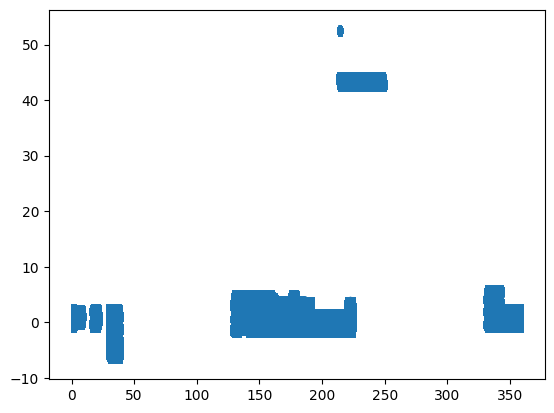

In [13]:
plt.scatter(bigdf_gal['ra_pz'],bigdf_gal['dec_pz'], s=0.5, alpha=0.5)
#plt.xlim([200.3,200.5])
#plt.ylim([0.9,1])
plt.show()

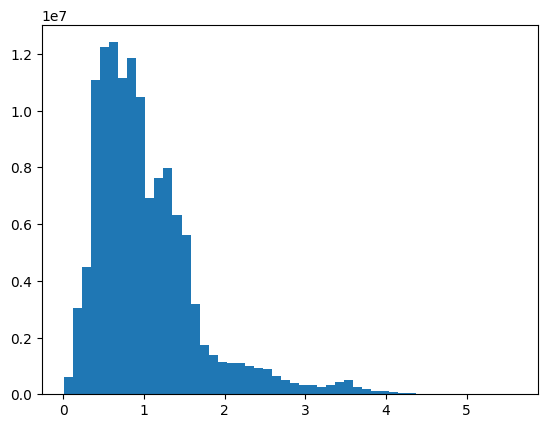

In [16]:
plt.hist(bigdf_gal['photoz_best_pz'],bins=50);
plt.show()

In [30]:
bigdf_star = match2[ctots]

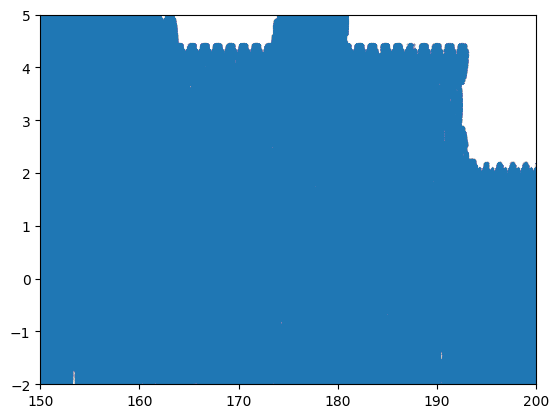

In [33]:
plt.scatter(bigdf_gal['ra_pz'],bigdf_gal['dec_pz'], s=0.1, alpha=0.01)
plt.xlim([150,200])
plt.ylim([-2,5])
plt.show()

In [34]:
bigdf_star

,object_id_mag,g_cmodel_mag_mag,r_cmodel_mag_mag,isprimary_mag,i_cmodel_mag_mag,z_cmodel_mag_mag,y_cmodel_mag_mag,g_cmodel_magerr_mag,r_cmodel_magerr_mag,i_cmodel_magerr_mag,...,ra_pz,dec_pz,Norder_pz,Dir_pz,Npix_pz,_dist_arcsec,coord_ra_hsc_g,coord_dec_hsc_g,modelfit_CModel_fracDev_hsc_g,modelfit_CModel_exp_apCorr_hsc_g
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
1152921505319878656,42045736963038719,24.054588,23.396921,True,23.116793,22.991911,22.942009,0.015796,0.013386,0.013754,...,134.998711,0.001234,6,0,4096,0.0,134.998711,0.001234,1.0,0.984133
1152921551700492288,42045736963018849,24.016159,23.269417,True,22.95722,22.786869,22.684387,0.016694,0.012158,0.01209,...,134.992048,0.01114,6,0,4096,0.0,134.992048,0.01114,0.0,0.988991
1152921567982780416,42045736963039303,22.424358,21.161945,True,20.000065,19.487711,19.279285,0.00478,0.002541,0.001014,...,134.99728,0.014269,6,0,4096,0.0,134.99728,0.014269,1.0,0.987904
1152921583589785600,42045736963039299,23.655003,22.278936,True,20.373072,19.562859,19.206282,0.013493,0.006327,0.001253,...,135.008939,0.013954,6,0,4096,0.0,135.008939,0.013954,1.0,0.987415
1152921585061986304,42045736963039350,24.194645,22.723289,True,21.085957,20.404121,20.115389,0.020891,0.009521,0.002234,...,135.006446,0.014686,6,0,4096,0.0,135.006446,0.014686,1.0,0.988142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682136394034839552,41245601735642073,19.52508,19.097111,True,18.92342,18.828474,18.782982,0.000861,0.000783,0.000452,...,225.004374,-0.016768,6,40000,45055,0.0,225.004374,-0.016768,0.0,0.978686
12682136418227585024,41245601735658997,24.942692,23.653639,True,22.93626,22.555008,22.341095,0.036869,0.025989,0.009736,...,224.990821,-0.024463,6,40000,45055,0.0,224.990821,-0.024463,1.0,0.977935
12682136475400142848,41245601735659284,19.521549,19.310869,True,19.02541,19.136189,19.065266,0.001053,0.001218,0.000615,...,224.98754,-0.013351,6,40000,45055,0.0,224.98754,-0.013351,1.0,0.977867


In [35]:
bigdf_gal

,object_id_mag,g_cmodel_mag_mag,r_cmodel_mag_mag,isprimary_mag,i_cmodel_mag_mag,z_cmodel_mag_mag,y_cmodel_mag_mag,g_cmodel_magerr_mag,r_cmodel_magerr_mag,i_cmodel_magerr_mag,...,ra_pz,dec_pz,Norder_pz,Dir_pz,Npix_pz,_dist_arcsec,coord_ra_hsc_g,coord_dec_hsc_g,modelfit_CModel_fracDev_hsc_g,modelfit_CModel_exp_apCorr_hsc_g
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
1152921506351677440,42045736963038773,25.030376,23.988865,True,23.663059,23.368797,23.357758,0.060486,0.033936,0.036098,...,135.000339,0.002146,6,0,4096,0.0,135.000339,0.002146,0.0,0.983837
1152921506624307200,42045736963038772,24.754566,24.394215,True,24.060602,23.625294,23.278343,0.032087,0.034663,0.032505,...,135.001126,0.002717,6,0,4096,0.0,135.001126,0.002717,1.0,0.986229
1152921510386597888,42045736963018599,23.765141,23.244118,True,22.538471,22.217865,22.036289,0.01611,0.01538,0.010062,...,135.004395,0.004557,6,0,4096,0.0,135.004395,0.004557,0.0,0.985443
1152921512148205568,42045736963018623,23.324654,22.591885,True,22.240723,22.03056,21.959774,0.014575,0.011517,0.010666,...,135.002861,0.004971,6,0,4096,0.0,135.002861,0.004971,0.0,0.985805
1152921515780472832,42045736963038874,24.902676,24.705908,True,23.994253,23.719196,23.699333,0.052621,0.056989,0.037956,...,134.996025,0.004544,6,0,4096,0.0,134.996025,0.004544,1.0,0.9875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682136523865325568,41245601735659592,24.007427,23.463627,True,21.981031,21.172455,21.329884,0.063759,0.036201,0.009331,...,224.997139,-0.009118,6,40000,45055,0.0,224.997139,-0.009118,1.0,0.978109
12682136538255982592,41245601735642525,25.565186,23.849463,True,22.46981,21.863396,21.570576,0.0813,0.031822,0.007817,...,225.003142,-0.005594,6,40000,45055,0.0,225.003142,-0.005594,0.0,0.978886
12682136539845623808,41245601735642602,25.767666,25.130713,True,24.731062,24.712986,24.327229,0.113638,0.120082,0.056707,...,225.003478,-0.004054,6,40000,45055,0.0,225.003478,-0.004054,1.0,0.978988


In [12]:
risk = cat_pz['photoz_risk_best'].compute()

In [14]:
import matplotlib.pyplot as plt

(array([1.4562315e+07, 2.0674265e+07, 1.6772169e+07, 1.4010455e+07,
        1.2359272e+07, 1.1366881e+07, 1.0806927e+07, 1.0494816e+07,
        1.0316927e+07, 1.0225046e+07, 1.0167209e+07, 1.0177488e+07,
        1.0261493e+07, 1.0341663e+07, 1.0387856e+07, 1.0475048e+07,
        1.0626251e+07, 1.0865853e+07, 1.1095990e+07, 1.1274857e+07,
        1.1413834e+07, 1.1514360e+07, 1.1602053e+07, 1.1663217e+07,
        1.1702757e+07, 1.1738740e+07, 1.1765148e+07, 1.1788189e+07,
        1.1832186e+07, 1.1903145e+07, 1.1995006e+07, 1.2093454e+07,
        1.2161703e+07, 1.2167210e+07, 1.2076292e+07, 1.1841185e+07,
        1.1469618e+07, 1.0920103e+07, 1.0248822e+07, 9.4806790e+06,
        8.6337180e+06, 7.6941910e+06, 6.5965760e+06, 5.2418140e+06,
        3.5826260e+06, 1.8815140e+06, 6.7403100e+05, 1.6193500e+05,
        2.8587000e+04, 1.6740000e+03]),
 array([2.45366944e-04, 1.60500389e-02, 3.18547115e-02, 4.76593822e-02,
        6.34640530e-02, 7.92687237e-02, 9.50733945e-02, 1.10878065e-01,


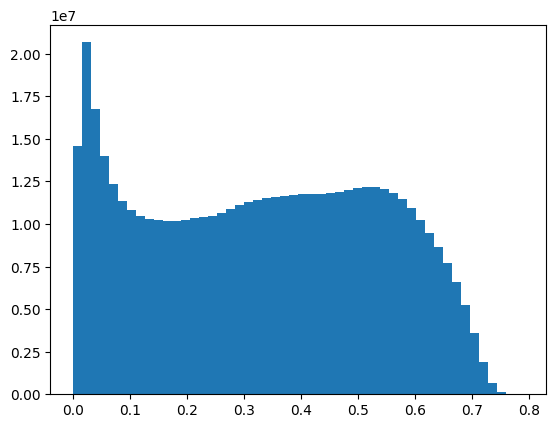

In [15]:
plt.hist(risk,bins=50)